Время генерации выборки с неупорядоченными весами: 0.013453960418701172
Время генерации выборки с упорядоченными весами: 0.004397869110107422


(array([ 57., 156.,  72., 115., 159., 269.,  65.,   8.,   0.,  99.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

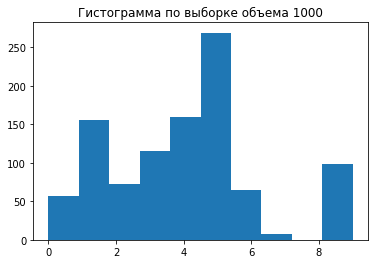

In [59]:
#Задача 1

#Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 
#с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. 
#По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. 
#Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import time

T1 = time.time()
W = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
W = W / W.sum()    
uniform = np.random.uniform(size=1000)
A = np.zeros(1000)
for i in range(uniform.size):
    S = 0
    for j in range(len(W)):
        if W[j] + S >= uniform.flat[i]:
            A.flat[i] = j
            break
        S += W[j]
T2 = time.time()
print("Время генерации выборки с неупорядоченными весами:", T2-T1)


T3 = time.time()
Weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
Weights = Weights / Weights.sum()
Weights = list(enumerate(Weights))
Weights.sort(key=itemgetter(1), reverse=True)
uniform = np.random.uniform(size=1000)
B = np.zeros(1000)
for i in range(uniform.size):
    S = 0
    for number, Weight in Weights:
        if Weight + S >= uniform.flat[i]:
            B.flat[i] = number
        break
        S += Weight
T4 = time.time()
print("Время генерации выборки с упорядоченными весами:", T4-T3)

plt.title("Гистограмма по выборке объема 1000")
plt.hist(A, bins=10)

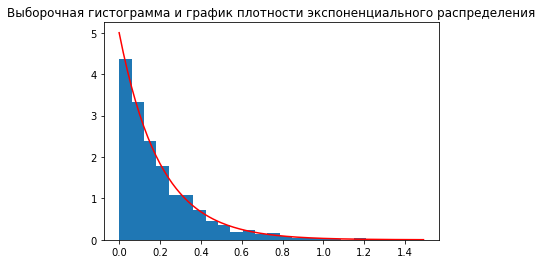

In [75]:
#Задача 2

#Смоделируйте выборку размера 1000 из распределения  𝐸𝑥𝑝(𝜆) . 
#Постройте выборочную гистограмму и точный график плотности распределения.
#(Inverse transform method)

#обратная функция к функции F экспоненциального распределения - это ln(1-F)/(-𝜆)

import scipy.stats

Lambda = 5
uniform = np.random.uniform(size=1000)
F1 = np.log(1 - uniform) / (-Lambda)
plt.hist(F1, density=True, bins=20)
A = np.arange(0, 1.5, .01)
plt.title("Выборочная гистограмма и график плотности экспоненциального распределения")
plt.plot(A, scipy.stats.expon.pdf(A, scale=1 / Lambda),color="red")


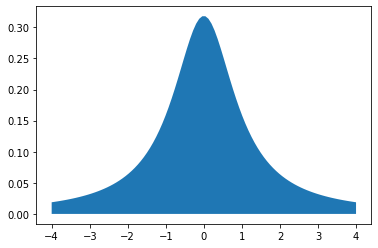

In [76]:
#Задача 3

#Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. 
#Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор 
#равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните 
#его с графиком точной функции плотности.

from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

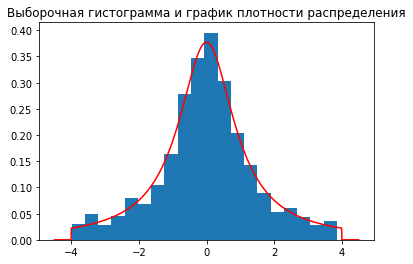

In [98]:
#Хотим выборку из распр-я P, знаем - только Pi. Пусть есть константа C: P <= C*Pi.
#Генерируем элемент x из неизвестного распр-я P, затем генериуем y из равномерного Pi на [0,1].
#Если y <= P(x)/(C*Pi(x)), то оставляем, иначе - повторяем.

def myCauchy(x, x1, x2):
    Dens = scipy.stats.cauchy.pdf(x)
    Dens[(x < x1) | (x > x2)] = 0
    Dens /= scipy.stats.cauchy.cdf(x2) - scipy.stats.cauchy.cdf(x1)
    return Dens

Pi = np.random.uniform(low=-4, high=4, size=10000)
P_dens = myCauchy(Pi, -4, 4)
Pi_dens = scipy.stats.uniform.pdf(Pi, loc=-4, scale=8)
y = np.random.uniform(size=10000)
C = 7
P = Pi[y < P_dens / (C * Pi_dens)]
P = P[:1000]
plt.hist(P, density=True, bins=20)
A = np.linspace(-4.5, 4.5, 1000)
plt.title("Выборочная гистограмма и график плотности распределения")
plt.plot(A, myCauchy(A, -4, 4),color="red")

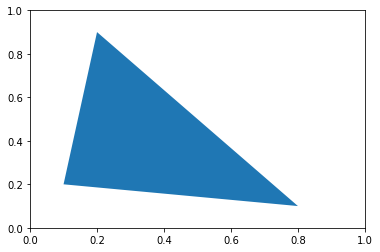

In [99]:
#Задача 4

#(Coordinate transformation method: найти преобразование координат, которое переводит простую область 
#(из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.)

#Задача: Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника 
#без использования метода отбора. Треугольник:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

Text(0.5, 1.0, 'Выборка объёма 500 в треугольнике')

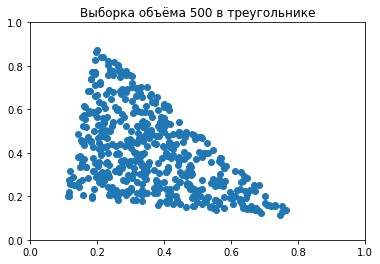

In [125]:
import math as m

X = np.random.uniform(size=500)
Y = np.random.uniform(size=500)
mask = (X + Y) > 1
X[mask] = - X[mask] + 1
Y[mask] = - Y[mask] + 1
d=m.sqrt(0.7*0.7 + 0.1*0.1)
X=X*d
Y=Y*d
alpha = m.atan2(-1, 7)
t = X
X = X*m.cos(alpha)-Y*m.sin(alpha)+0.1
Y = t*m.sin(alpha)+Y*m.cos(alpha)+0.2

plt.scatter(X, Y)
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Выборка объёма 500 в треугольнике")

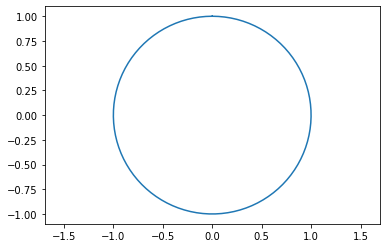

In [110]:
#Задача 5

#Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Выборка объёма 500 в круге')

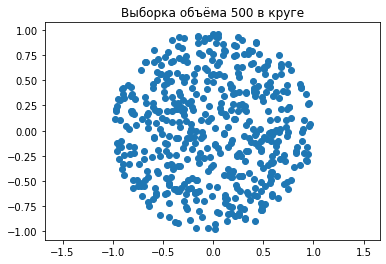

In [124]:
#переходим от X, Y и равномерного на [0,1] к полярным R, alpha и равномерному на [0,2pi].

alpha = np.random.uniform(low=0, high=2 * np.pi, size=500)
R = np.random.uniform(size=500)
R = np.sqrt(R)
plt.scatter(R * np.cos(alpha), R * np.sin(alpha))
plt.axis('equal')
plt.title("Выборка объёма 500 в круге")

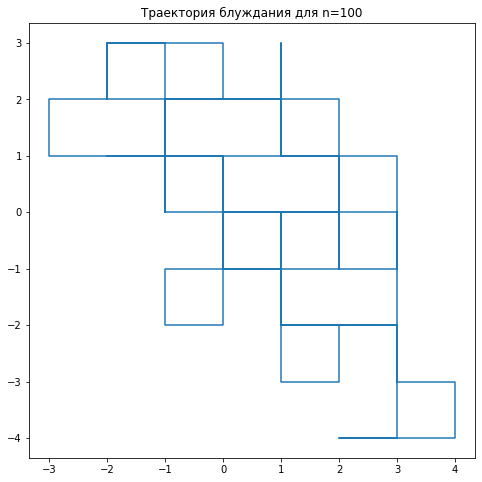

In [129]:
#Задача 6

#Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0).
#Приведите графики выборочных траекторий для n=100.

#В исходных координатах (X,Y) возможные варианты ходов:(1,0), (0,1), (-1,0), (0,-1).
#Перейдём к другой системе (P, Q), где P=X+Y, Q=X-Y и все по 2 варианта на каждую переменную. 
#Возможные варианты ходов в этом случае: (1,1), (1,-1), (-1,1), (-1,-1).
#Начало совпадает с концом и = 0, поэтому сумма всех P и Q по точкам траектории должна быть 0.
#Выбираем случайно n/2 мест для 1.

def func(n):
    X_ind1 = np.random.choice(np.arange(n), n//2, replace = False)
    Y_ind1 = np.random.choice(np.arange(n), n//2, replace = False)
    Pi = np.ones(n)  #ход каждого шага 
    Qi = np.ones(n)
    Pi[-X_ind1] = -1
    Qi[-Y_ind1] = -1
    P = np.cumsum(Pi)  #координата каждого шага
    Q = np.cumsum(Qi)
    X = (P+Q)/2
    Y = (P-Q)/2
    return X,Y

X,Y=func(100)
plt.figure(figsize=(8,8))
plt.plot(X,Y)
plt.title("Траектория блуждания для n=100")
plt.show()

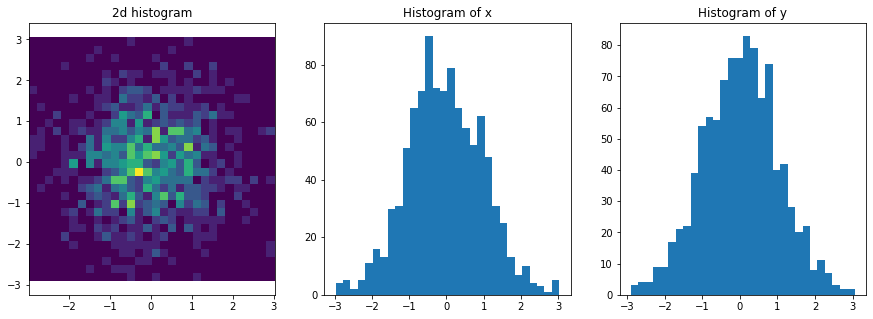

In [130]:
#Задача 7

#Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. 
#Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. 
#С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения
#со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

n = 1000
u1, u2 = np.random.rand(2, n)  
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

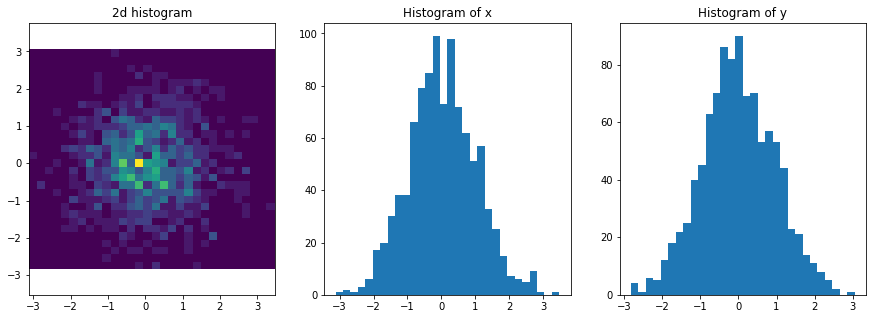

In [134]:
#Оптимизируем: используем второй вариант преобразования Бокса — Мюллера без sin, cos.

n = 1000
k = 0
Z0 = np.array([])
Z1 = np.array([])
while k<n:
    A, B = 2*np.random.rand(2,1)-1
    Sk = A*A + B*B
    if 0<Sk<=1:
        Z0 = np.append(Z0, A)
        Z1 = np.append(Z1, B)
        k=k+1
S = Z0*Z0 + Z1*Z1
R = np.sqrt(-2 * np.log(S)/S)
X = Z0 * R
Y = Z1 * R
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(X, Y, bins=30)
ax[0].axis('equal')
ax[1].hist(X, bins=30)
ax[2].hist(Y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

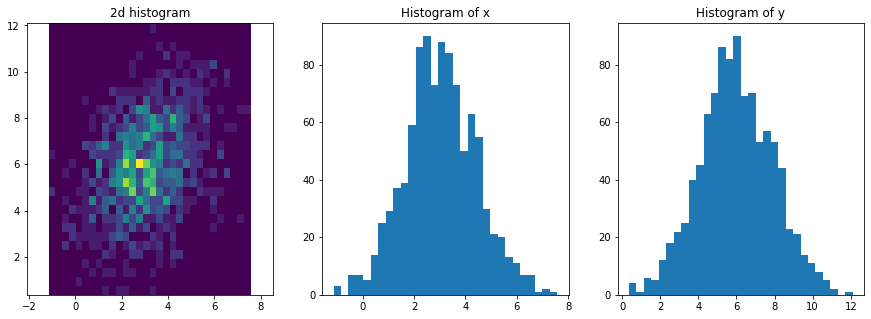

In [136]:
#Чтобы из N(0,1) получить выборку из требуемого распределения нужно просто применить 
#к генерируемой случайной величине линейное преобразование с соотвествующей матрицей С=((sqrt(7)/2,1/2),(0,2)) и сдвинуть на вектор нового матожидания.

X1 = np.sqrt(7) / 2 * X + 1 / 2 * Y + 3
Y1 = 2 * Y + 6
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(X1, Y1, bins=30)
ax[0].axis('equal')
ax[1].hist(X1, bins=30)
ax[2].hist(Y1, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

In [15]:
#Задача 8

#Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. 
#С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.
#Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.
#Подсказка 2: ссыль.

def funct(n, size):
    A = np.zeros(n)
    F = 1
    for i in range(n):
        F *= (i + 1)
        A[i] = (i + 1)**n/F
    A /= A.sum()
    B = np.random.choice(np.arange(1, n + 1), p=A, size=size)
    C = np.zeros((size, n))
    for i in range(size):
        C[i, :] = np.random.choice(np.arange(1,B[i]+1),size=n)
        
    return C

In [16]:
import numpy as np

funct(100, 40000).max(axis=1).mean()

29.599875